In [22]:
import spacy, benepar, nltk
#benepar.download('benepar_en3')

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pyperclip as clip

In [24]:
nlp = spacy.load('en_core_web_md')

In [25]:
if spacy.__version__.startswith('2'):
    nlp.add_pipe(benepar.BeneparComponent("benepar_en3"))
else:
    nlp.add_pipe("benepar", config={"model": "benepar_en3"})

In [26]:
import sys
sys.path.append('../')
from FullParser.ClauseParser import ClauseParser
import pandas as pd

In [27]:
parser = ClauseParser()

In [28]:
def read_file(file_path):
    with open(file_path, 'r', encoding = 'utf-8') as f:
        for line in f:
            yield line

In [29]:
dolma_path = "../Datasets/dolma/dolma/dolma_text/"
current_file = "v1_5r2_sample-0005.txt"

In [156]:
# Fully processed sample of sample
new_ECs = pd.read_json('./v1_5r2_sample-0005.txt.json')

37293

In [296]:
# Mega acceptability White & Rawlins 2016, 2020 An & White 2020
mega_acceptability = pd.read_csv('../Datasets/mega-acceptability-v2/mega-acceptability-v2.tsv',sep='\t')

In [317]:
mega_verbs = (set(mega_acceptability.verb.values))

## Predicate Lemma distibution

In [291]:
# quick and dirty concatenation of predicate lemmas
new_ECs['pred_lemmas'] = new_ECs['predicate'].apply(lambda x: ' '.join([pred['lemma'] for pred in x]))

In [292]:
new_ECs.groupby('type')['pred_lemmas'].value_counts()['polar']

pred_lemmas
             29
check        13
know         11
ask           9
decide        9
             ..
vote on       1
weigh         1
’ clear       1
’ from on     1
’ unclear     1
Name: count, Length: 73, dtype: int64

In [293]:
new_ECs.groupby('type')['pred_lemmas'].value_counts()['alternative']

pred_lemmas
know                       5
                           3
matter                     3
decide                     2
say                        2
ask                        1
assess                     1
be at corporate            1
be clear                   1
be fine                    1
be great                   1
be to layoff               1
be welcome                 1
care                       1
check                      1
count                      1
define                     1
determine                  1
determine by               1
die                        1
fast on                    1
get most out of            1
happen                     1
help                       1
help set                   1
in                         1
indicate on                1
look                       1
of                         1
roll out between depend    1
up to                      1
’                          1
Name: count, dtype: int64

In [294]:
new_ECs.groupby('type')['pred_lemmas'].value_counts()['constituent']

pred_lemmas
                    2279
know                1112
see                  608
tell                 271
learn                254
                    ... 
’re safe healthy       1
’re savvy              1
’re unsure             1
’ve                    1
’ve cute be            1
Name: count, Length: 2705, dtype: int64

In [295]:
new_ECs.groupby('type')['pred_lemmas'].value_counts()['declarative']

pred_lemmas
                                      3607
think                                 1822
say                                   1625
know                                  1049
hope                                   913
                                      ... 
’re happy with                           1
’re hopeful                              1
’re prepared                             1
’re sweet                                1
’s getting find by local potential       1
Name: count, Length: 4485, dtype: int64

## MegaAcceptability comparisson

In [319]:
# Predicates found from MegaAcceptability
found_MA_preds = {pred for pred in set(new_ECs['pred_lemmas'].values) if pred in mega_verbs}
len(found_MA_preds)

440

In [391]:
MA_pred_counts = new_ECs[new_ECs['pred_lemmas'].apply(lambda x: x in found_MA_preds)]['pred_lemmas'].value_counts() 
MA_pred_counts[:20]

pred_lemmas
know          2177
think         1863
say           1718
hope           920
see            874
tell           602
believe        387
mean           386
learn          322
wonder         291
ensure         286
show           285
note           253
feel           234
ask            218
wish           212
remember       208
happen         199
guess          199
understand     195
Name: count, dtype: int64

<Axes: xlabel='pred_lemmas'>

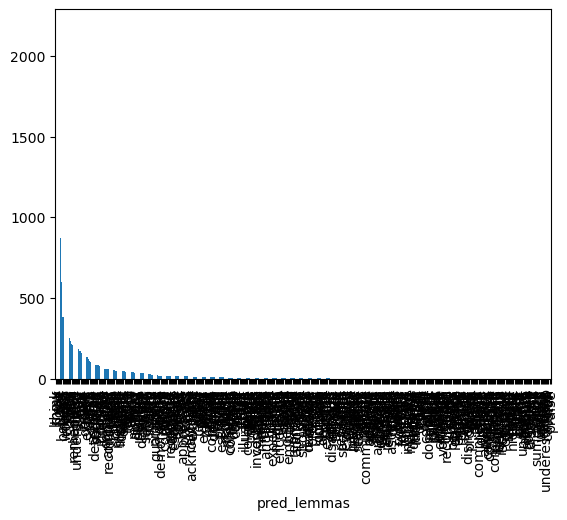

In [365]:
MA_pred_counts.plot.bar()

## Analyzing Predicates beyond MA

In [352]:
# Predicates not in MegaAcceptability
extra_MA_preds = set(filter( lambda x: all(c.isalnum() for c in x), {pred for pred in set(new_ECs[new_ECs['predicate'].apply(lambda x: len(x)==1)]['pred_lemmas'].values) if pred not in mega_verbs}))
# Non-alphanimeric predicates
extra_MA_preds_nonan = set(filter( lambda x: any( not c.isalnum() for c in x), {pred for pred in set(new_ECs[new_ECs['predicate'].apply(lambda x: len(x)==1)]['pred_lemmas'].values) if pred not in mega_verbs}))
# complex predicates
complex_preds = set(new_ECs[new_ECs['predicate'].apply(lambda x: len(x)>1)]['pred_lemmas'].values)

In [376]:
extra_MA_pred_counts = new_ECs[new_ECs['pred_lemmas'].apply(lambda x: x in extra_MA_preds)]['pred_lemmas'].value_counts() 
extra_MA_pred_counts[:70]

pred_lemmas
do         419
have       178
wait       113
in          88
of          72
          ... 
live         9
exist        9
as           9
thought      9
arise        9
Name: count, Length: 70, dtype: int64

### Extraneous predicates from MA

In [392]:
def nlp_parse(sent):
    return nltk.Tree.fromstring(list(nlp(sent).sents)[0]._.parse_string).pretty_print()

In [445]:
new_ECs[new_ECs['pred_lemmas'] == weird_predicate ].iloc[1]

sentence       My question is – how do you figure out who the...
predicate           [{'str': 'in', 'lemma': 'in', 'POS': 'ADP'}]
type                                                 declarative
clause                                    in order to email them
pred_lemmas                                                   in
Name: 1095, dtype: object

In [452]:
# Set the predicate we want to look at
weird_predicate = extra_MA_pred_counts.index[3]
print(f'Weird predicate: {weird_predicate}')
# Get a sentence from that weird predicate
weird_pred_sent = new_ECs[new_ECs['pred_lemmas'] == weird_predicate ].iloc[0]['sentence']
# Print syntactic tree
nlp_parse(weird_pred_sent)

Weird predicate: in
                                 S                                      
  _______________________________|____________________________________   
 |       VP                                                           | 
 |    ___|________                                                    |  
 |   |   |        VP                                                  | 
 |   |   |    ____|___                                                |  
 |   |   |   |        S                                               | 
 |   |   |   |        |                                               |  
 |   |   |   |        VP                                              | 
 |   |   |   |     ___|____                                           |  
 |   |   |   |    |        VP                                         | 
 |   |   |   |    |    ____|_____                                     |  
 |   |   |   |    |   |         SBAR                                  | 
 |   |   |   |    |   |  

In [469]:
parser.parse_clauses(list(nlp(weird_pred_sent).sents)[0]) # Full Parse
# new_ECs[new_ECs['pred_lemmas'] == weird_predicate ].iloc[0] # Entry

/opt/homebrew/Caskroom/miniconda/base/envs/benepar_env/lib/python3.12/site-packages/torch/distributions/distribution.py:53: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(


[{'sentence': 'I can’t wait to see how it’ll look in a few more years.',
  'predicate': [{'str': 'see', 'lemma': 'see', 'POS': 'VERB'}],
  'type': 'constituent',
  'clause': 'how it’ll look in a few more years'}]

In [471]:
nlp_parse('At the post-secondary level, students fall into four categories, depending on whether their work placement is paid or unpaid, and whether their work placement is optional or a mandatory requirement for graduation.')

                                                                                                                      S                                                                                                                                    
          ____________________________________________________________________________________________________________|__________________________________________________________________________________________________________________________________   
         |                         |     |                            VP                                                                                                                                                                                 | 
         |                         |     |       _____________________|__________________________________                                                                                                                                          

/opt/homebrew/Caskroom/miniconda/base/envs/benepar_env/lib/python3.12/site-packages/torch/distributions/distribution.py:53: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(


In [458]:
clip.copy(weird_pred_sent)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## Empty Predicate Parses
Lets look at the empty predicates in each category

In [289]:
## Declarative empty predicates
test = new_ECs[(new_ECs['pred_lemmas'] == '') & (new_ECs['type']== 'polar')][['sentence','clause']].iloc[0]['sentence']
tree = nltk.Tree.fromstring(list(nlp(test).sents)[0]._.parse_string)
# Print the tree in ASCII
tree.pretty_print()

                             S                                      
            _________________|____________________________________   
           VP                                                     | 
    _______|_________________                                     |  
   |                        SBAR                                  | 
   |        _________________|________                            |  
   |       |                          S                           | 
   |       |           _______________|______                     |  
   |       |          |                      VP                   | 
   |       |          |                ______|_____               |  
   |       |          |               |            VP             | 
   |       |          |               |       _____|______        |  
   |       |          NP              |      |            NP      | 
   |       |      ____|______         |      |            |       |  
  VBZ      IN    DT        

/opt/homebrew/Caskroom/miniconda/base/envs/benepar_env/lib/python3.12/site-packages/torch/distributions/distribution.py:53: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(


In [ ]:
## Declarative empty predicates
test = new_ECs[(new_ECs['pred_lemmas'] == '') & (new_ECs['type']== 'declarative')][['sentence','clause']].iloc[1]['sentence']
tree = nltk.Tree.fromstring(list(nlp(test).sents)[0]._.parse_string)
# Print the tree in ASCII
tree.pretty_print()

In [ ]:
## Declarative empty predicates
test = new_ECs[(new_ECs['pred_lemmas'] == '') & (new_ECs['type']== 'declarative')][['sentence','clause']].iloc[1]['sentence']
tree = nltk.Tree.fromstring(list(nlp(test).sents)[0]._.parse_string)
# Print the tree in ASCII
tree.pretty_print()

In [288]:
## Declarative empty predicates
test = new_ECs[(new_ECs['pred_lemmas'] == '') & (new_ECs['type']== 'declarative')][['sentence','clause']].iloc[1]['sentence']
tree = nltk.Tree.fromstring(list(nlp(test).sents)[0]._.parse_string)
# Print the tree in ASCII
tree.pretty_print()

                   S                                
  _________________|______________________________   
 |        VP                                      | 
 |    ____|___                                    |  
 |   |       SBAR                                 | 
 |   |        |                                   |  
 |   |        S                                   | 
 |   |     ___|_________                          |  
 |   |    |             VP                        | 
 |   |    |    _________|______________           |  
 NP  |    NP  |    |    |    |         NP         | 
 |   |    |   |    |    |    |     ____|____      |  
PRP VBP  PRP VBZ   RB   JJ   IN   DT       NNS    . 
 |   |    |   |    |    |    |    |         |     |  
 I  know she  ’s   so right  on these     points  . 



/opt/homebrew/Caskroom/miniconda/base/envs/benepar_env/lib/python3.12/site-packages/torch/distributions/distribution.py:53: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(


                                                S                                                  
        ________________________________________|________________________________________________   
       |                    VP                                                                   | 
       |               _____|_____                                                               |  
       |              |          SBAR                                                            | 
       |              |      _____|____                                                          |  
       |              |     |          S                                                         | 
       |              |     |      ____|________                                                 |  
       |              |     |     |             VP                                               | 
       |              |     |     |     ________|________________                               

In [ ]:
t = time.time()
times = []
line_count = 1
ECs = []
for line in read_file(dolma_path+current_file):
    sline = line.strip('\n')
    if len(line) <100 :
        try:
            doc = nlp(sline)
            for sent in doc.sents:
                parse = parser.parse_clauses(sent)
                if parse != []:
                    # print(f'Line {line_count} has an embedded clause!')
                    ECs.append(parse)
        except Exception as e:
            #print(f"Error encountered while processing line {line_count}: {sline}")
            print(e)
            pass  # Do nothing, continue to next line
    line_count+=1
    if line_count % 1000 == 0:
        print(f'Time to parse 1000 entries: {time.time()-t}')
        times.append(time.time()-t)
        t = time.time()

In [34]:
flat_ECs = []
for parse in ECs:
    flat_ECs += parse

18006

In [ ]:
flat_ECs

In [48]:
# Function to get the top N elements of a list
def top_n(a,n):
    return np.flip(np.argsort(a)[-n:])

In [ ]:
ex = []
count = 0
for ec in flat_ECs:
    if list(nlp(ec['clause']).sents)[0][0]=='until':
        ex.append(ec)
        count += 1
    if count > 10:
        break
    
ex

In [149]:
pd.Series([ec['predicate'][0]['lemma'] for ec in flat_ECs if (len(ec['predicate'])==1 and ec['type'] == 'alternative')]).value_counts()

matter       2
say          2
care         1
decide       1
of           1
determine    1
happen       1
assess       1
count        1
know         1
die          1
Name: count, dtype: int64

In [148]:
pd.Series([ec['predicate'][0]['lemma'] for ec in flat_ECs if (len(ec['predicate'])==1 and ec['type'] == 'polar')]).value_counts()

check          9
set            6
indicate       5
wonder         4
ask            3
specify        2
verify         2
see            2
determine      2
investigate    2
decide         2
make           2
know           2
enable         1
for            1
bring          1
inform         1
matter         1
assess         1
impact         1
consider       1
change         1
backwash       1
establish      1
track          1
explore        1
Name: count, dtype: int64

In [142]:
types = [parse['type'] for parse in flat_ECs]
len(types)
pd.Series(types).value_counts()

declarative    11775
constituent     6120
polar             89
alternative       22
Name: count, dtype: int64

In [ ]:
preds = [parse['predicate'] for parse in flat_ECs]
len(preds)
preds

In [77]:
pred_lemmas = pd.Series([pred[0]['lemma'] for pred in  filter(lambda x: len(x)==1,preds)])
pred_string = pd.Series([pred[0]['str'] for pred in  filter(lambda x: len(x)==1,preds)])

In [139]:
# ((100*pred_lemmas.value_counts()/len(preds))[0:20]
pred_lemmas.value_counts()[150:200]

thank         8
include       8
good          8
define        8
drop          8
occur         8
predict       8
bring         8
hate          8
play          8
appreciate    8
same          7
rotate        7
declare       7
recognise     7
print         7
worry         7
allow         7
hide          7
cause         7
fear          7
pay           7
sure          7
easy          7
mind          7
select        7
email         7
solve         6
avoid         6
manage        6
miss          6
end           6
close         6
complete      6
join          6
listen        6
grab          6
achieve       6
deliver       6
deny          6
be            6
sit           6
conclude      6
let           6
cover         6
kill          5
support       5
glad          5
smile         5
fry           5
Name: count, dtype: int64

In [81]:
(100*pred_string.value_counts()/len(preds))[0:20]

know          4.753971
think         4.043097
said          2.365878
see           1.938243
hope          1.760524
say           1.155170
says          0.827502
believe       0.794180
tell          0.777519
do            0.705320
thought       0.705320
’s            0.644230
means         0.555370
wish          0.510941
mean          0.488726
understand    0.460957
show          0.455404
ensure        0.438743
guess         0.438743
feel          0.416528
Name: count, dtype: float64

In [106]:
pred_verbs = [[p['lemma'] for p in pred if p['POS']=='VERB'] for pred in filter(lambda x: len(x)<5 ,preds)]
pred_verbs_joined = pd.Series(list(map(lambda x: ' '.join(x),pred_verbs)))

In [113]:
pred_verbs_joined.value_counts()

                   4257
know               1108
think               961
say                 878
hope                440
                   ... 
configure check       1
shave                 1
help promote          1
look see              1
decline comment       1
Name: count, Length: 1507, dtype: int64